In [1]:
import matplotlib.pyplot     as plt
import seaborn               as sns
from   sklearn.cluster       import KMeans, DBSCAN
from   sklearn.datasets      import fetch_openml
from   sklearn.decomposition import PCA

In [2]:
# Le dataset Iris est dans Seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualiser les points de données par des features dans un diagramme de dispersion.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

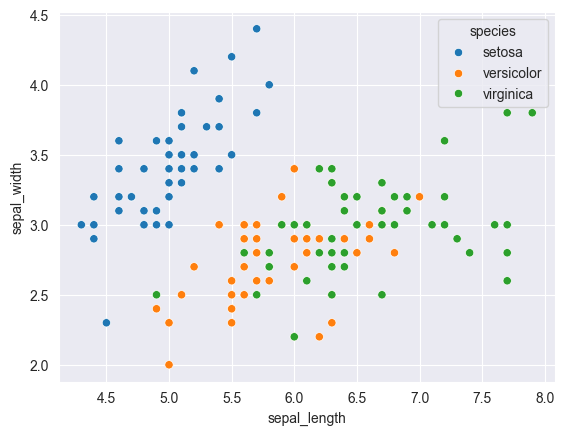

In [3]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

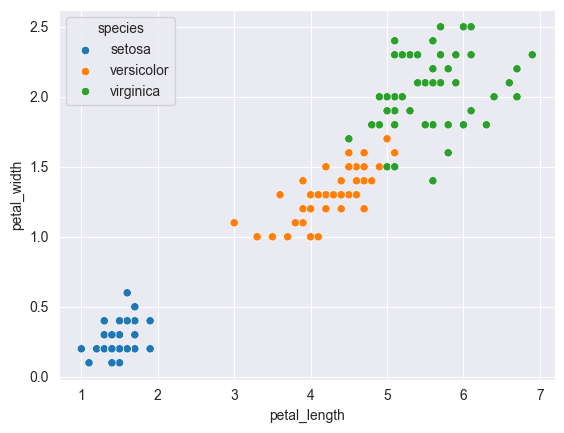

In [4]:
sns.scatterplot(iris, x='petal_length', y='petal_width', hue='species')

<Axes: xlabel='sepal_width', ylabel='petal_width'>

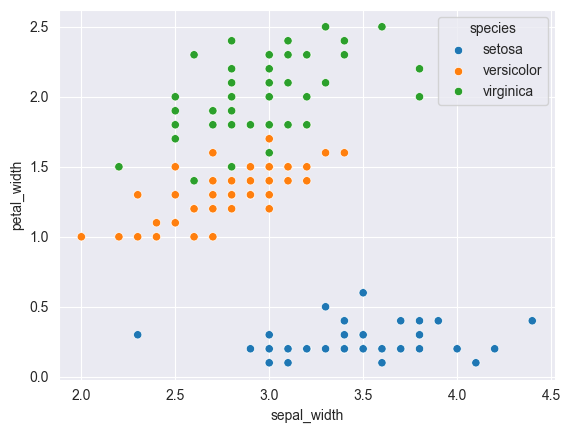

In [5]:
sns.scatterplot(iris, x='sepal_width', y='petal_width', hue='species')

Trois clusters d'iris (setosa, versicolor et virginica)

Afin de comprendre le concept de '`KMeans`' et de '`DBSCAN`' (Density-Based Spatial Clustering of Applications with Noise).
Deux features de l’ensemble de données Iris et entraîner un modèle KMeans en donnant au paramètre '`n_clusters`' la valeur 3.

## **Que montre les KMeans ?**

In [6]:
X = iris[['sepal_length', 'petal_length']].values

km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

'`km.predict()`' donnera les clusters créés par le modèle KMeans.
Je mets '`km.predict(X)`' au paramètre de teinte 'hue'.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

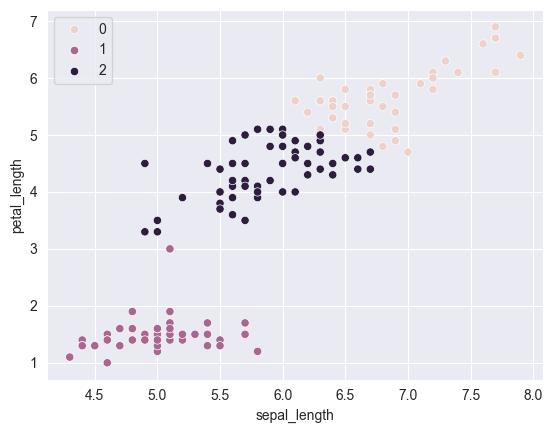

In [7]:
sns.scatterplot(iris, x='sepal_length', y='petal_length', hue=km.predict(X))

Le modèle s’est très bien regroupé.
Il y a quelques points incorrects. Nonobstant, le clustering (regroupement) est quand même bon.

## **Quelles visualisations montre DBSCAN ?**

In [8]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X)

dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Il n'y a que deux groupes.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

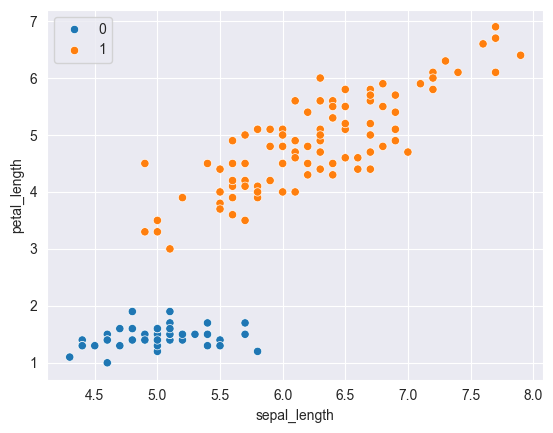

In [9]:
sns.scatterplot(iris, x='sepal_length', y='petal_length', hue=dbscan.labels_)

Il est choisi un point aléatoire dans le plan, puis en considérant ce point aléatoire comme centre, est dessiné un cercle de 1cm (c’est la valeur du eps – voir le paramètre dans DBSCAN()).
Combien y a-t-il de points dans le cercle ?
S’il y a 6 points à l’intérieur du cercle (c’est la valeur de '`min_samples`' – voir le paramètre dans '`DBSCAN())`', ces 6 points forment un cluster.
Et choisirons l’un des 6 points du cercle et répéterons le même processus jusqu’à avoir regroupé tous les points qui sont proches les uns des autres.

## **Et les PCA ?**

Utiliser 'MNIST', car il a plus de dimensions.

L'objectif avec le PCA est de réduire la dimension, le choix d’un ensemble de données avec plus de features serait le bon choix.

In [10]:
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data / 255.0   # Échelle des valeurs des pixels entre 0 et 1
y = mnist.target

# Réduire la dimensionnalité à l'aide du PCA
pca = PCA(n_components=2)   # Réduire à 2 composantes principales
X_pca = pca.fit_transform(X)

X_pca

array([[ 0.47943237,  1.24013272],
       [ 3.96272158,  1.13711224],
       [-0.23135666, -1.54391155],
       ...,
       [-1.06473339, -2.31403333],
       [-1.21656793,  0.45775353],
       [ 4.15240049,  0.32702956]], shape=(70000, 2))

Stocker les features dans la variable X (et mise à l’échelle), puis stocker l’étiquette ou la cible dans la variable y.

Créer le modèle PCA et donné au paramètre n_components la valeur 2.
Donc, après la transformation, il n'y aura que deux features.

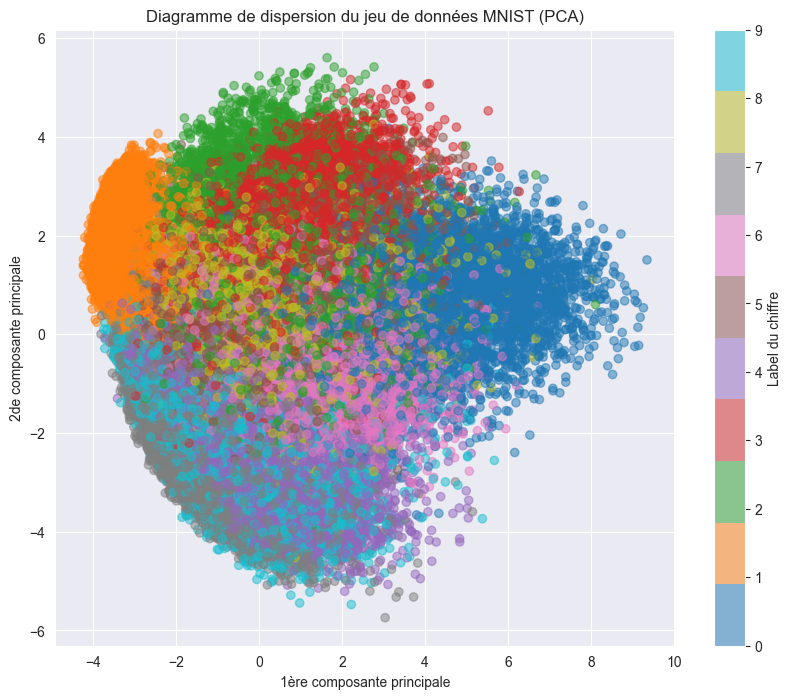

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='tab10', alpha=0.5)
plt.colorbar(label='Label du chiffre')
plt.xlabel('1ère composante principale')
plt.ylabel('2de composante principale')
plt.title('Diagramme de dispersion du jeu de données MNIST (PCA)')
plt.grid(True)

Les bleu (9) et gris (7) se chevauchent, car 9 et 7 se ressemblent un peu en écrivant à la main.